In [1]:
import pandas as pd
import numpy as np

epl_transfer = pd.read_csv(r'G:\My Drive\05. Project\01. 2021-2022 PL Transfer\data\transfer\ENG-premier-league.csv')

### Processing Transfer Fee

In [2]:
epl_transfer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           22975 non-null  object 
 1   player_name         22975 non-null  object 
 2   age                 22960 non-null  float64
 3   position            22975 non-null  object 
 4   club_involved_name  22975 non-null  object 
 5   fee                 22971 non-null  object 
 6   transfer_movement   22975 non-null  object 
 7   transfer_period     22975 non-null  object 
 8   fee_cleaned         8739 non-null   float64
 9   league_name         22975 non-null  object 
 10  year                22975 non-null  int64  
 11  season              22975 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.1+ MB


In [3]:
epl_transfer

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
...,...,...,...,...,...,...,...,...,...,...,...,...
22970,Wolverhampton Wanderers,Hayao Kawabe,26.0,Central Midfield,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22971,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22972,Wolverhampton Wanderers,Adama Traoré,26.0,Right Winger,Barcelona,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22973,Wolverhampton Wanderers,Bruno Jordão,23.0,Central Midfield,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022


In [4]:
epl_transfer.rename(columns={'club_name': 'club_destination', 'club_involved_name':'club_origin', 'fee_cleaned':'transfer_fee'}, inplace=True)

In [5]:
transfer_period = ['Summer']
epl_selected = (epl_transfer[epl_transfer['transfer_period'].isin(transfer_period)])

transfer_movement = ['in']
epl_selected = (epl_selected[epl_selected['transfer_movement'].isin(transfer_movement)])

season = ['2021/2022']
epl_selected = (epl_selected[epl_selected['season'].isin(season)])

In [6]:
epl_selected = epl_selected[(epl_selected != 0).all(1)]
epl_selected = epl_selected[epl_selected['transfer_fee'].notna()]

In [7]:
epl_selected.drop(['age', 'fee', 'year', 'league_name', 'transfer_movement', 'transfer_period', 'season'], axis=1, inplace=True)

In [8]:
epl_selected

,club_destination,player_name,position,club_origin,transfer_fee
22292,Arsenal FC,Ben White,Centre-Back,Brighton,58.5
22293,Arsenal FC,Martin Ødegaard,Attacking Midfield,Real Madrid,35.0
22294,Arsenal FC,Aaron Ramsdale,Goalkeeper,Sheff Utd,28.0
22295,Arsenal FC,Takehiro Tomiyasu,Right-Back,Bologna,18.6
22296,Arsenal FC,Albert Sambi Lokonga,Central Midfield,RSC Anderlecht,17.5
...,...,...,...,...,...
22781,Wolverhampton Wanderers,Rayan Aït-Nouri,Left-Back,Angers SCO,11.1
22782,Wolverhampton Wanderers,José Sá,Goalkeeper,Olympiacos,8.0
22783,Wolverhampton Wanderers,Francisco Trincão,Right Winger,Barcelona,6.0
22784,Wolverhampton Wanderers,Yerson Mosquera,Centre-Back,Atl. Nacional,5.2


In [9]:
epl_selected['transfer_fee_log'] = epl_selected['transfer_fee'].apply(np.log10)
epl_selected

,club_destination,player_name,position,club_origin,transfer_fee,transfer_fee_log
22292,Arsenal FC,Ben White,Centre-Back,Brighton,58.5,1.767156
22293,Arsenal FC,Martin Ødegaard,Attacking Midfield,Real Madrid,35.0,1.544068
22294,Arsenal FC,Aaron Ramsdale,Goalkeeper,Sheff Utd,28.0,1.447158
22295,Arsenal FC,Takehiro Tomiyasu,Right-Back,Bologna,18.6,1.269513
22296,Arsenal FC,Albert Sambi Lokonga,Central Midfield,RSC Anderlecht,17.5,1.243038
...,...,...,...,...,...,...
22781,Wolverhampton Wanderers,Rayan Aït-Nouri,Left-Back,Angers SCO,11.1,1.045323
22782,Wolverhampton Wanderers,José Sá,Goalkeeper,Olympiacos,8.0,0.903090
22783,Wolverhampton Wanderers,Francisco Trincão,Right Winger,Barcelona,6.0,0.778151
22784,Wolverhampton Wanderers,Yerson Mosquera,Centre-Back,Atl. Nacional,5.2,0.716003


In [10]:
epl_selected['transfer_fee_normalized'] = epl_selected['transfer_fee_log']/epl_selected['transfer_fee_log'].max()

In [11]:
epl_selected

,club_destination,player_name,position,club_origin,transfer_fee,transfer_fee_log,transfer_fee_normalized
22292,Arsenal FC,Ben White,Centre-Back,Brighton,58.5,1.767156,0.853683
22293,Arsenal FC,Martin Ødegaard,Attacking Midfield,Real Madrid,35.0,1.544068,0.745913
22294,Arsenal FC,Aaron Ramsdale,Goalkeeper,Sheff Utd,28.0,1.447158,0.699097
22295,Arsenal FC,Takehiro Tomiyasu,Right-Back,Bologna,18.6,1.269513,0.613280
22296,Arsenal FC,Albert Sambi Lokonga,Central Midfield,RSC Anderlecht,17.5,1.243038,0.600490
...,...,...,...,...,...,...,...
22781,Wolverhampton Wanderers,Rayan Aït-Nouri,Left-Back,Angers SCO,11.1,1.045323,0.504978
22782,Wolverhampton Wanderers,José Sá,Goalkeeper,Olympiacos,8.0,0.903090,0.436267
22783,Wolverhampton Wanderers,Francisco Trincão,Right Winger,Barcelona,6.0,0.778151,0.375912
22784,Wolverhampton Wanderers,Yerson Mosquera,Centre-Back,Atl. Nacional,5.2,0.716003,0.345889


### Processing Stats

In [12]:
stats = pd.read_csv(r'G:\My Drive\05. Project\01. 2021-2022 PL Transfer\data\player_stats_2021.csv')

In [13]:
stats

,player,squad,played_per90,pos,goals,assists,gca,sca,passes_under_pressure,passes_crosses,...,tot_def,clearances,aerial_won,dribble_success,touches,saves,clean_sheets,passes_40yds_completed,crosses_stopped,outside_area_sweep
0,Aaron Connolly,Brighton,1.7,FW,0,0,0,2,6,1,...,2,0,0,0,34,NaN,NaN,NaN,NaN,NaN
1,Aaron Cresswell,West Ham,30.3,DF,2,3,5,49,209,63,...,110,76,36,3,2291,NaN,NaN,NaN,NaN,NaN
2,Aaron Lennon,Burnley,17.2,MF,2,0,5,32,64,30,...,65,13,10,15,564,NaN,NaN,NaN,NaN,NaN
3,Aaron Ramsdale,Arsenal,34.0,GK,0,0,1,1,88,0,...,0,2,0,2,1249,84.0,12.0,176.0,21.0,35.0
4,Aaron Wan-Bissaka,Manchester Utd,19.9,DF,0,0,1,31,140,22,...,132,48,19,36,1363,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,Yerry Mina,Everton,9.4,DF,0,0,0,3,69,2,...,41,47,38,0,459,NaN,NaN,NaN,NaN,NaN
542,Yoane Wissa,Brentford,14.3,FWMF,7,1,4,19,58,12,...,33,8,26,17,426,NaN,NaN,NaN,NaN,NaN
543,Youri Tielemans,Leicester City,29.2,MF,6,4,12,84,320,24,...,137,42,30,17,2084,NaN,NaN,NaN,NaN,NaN
544,Yves Bissouma,Brighton,23.5,MF,1,2,4,24,159,5,...,148,51,21,31,1484,NaN,NaN,NaN,NaN,NaN


In [14]:
stats.drop(['played_per90', 'pos'], axis=1, inplace=True)
stats = stats.fillna(0)

In [15]:
temp_drop = stats[['player','squad']]
stats = stats.drop(['player','squad'], axis=1)
stats = stats/stats.max()
stats[['player','squad']] = temp_drop

stats_t = stats.melt(id_vars=['player','squad'])

stats_t['byplayer_rank'] = (stats_t.groupby('player')['value']
                      .rank(method='dense', ascending=False)
                      .astype(int))

selected = pd.Series(stats_t['byplayer_rank'].unique()).nsmallest(5).values
stats_t = stats_t[stats_t['byplayer_rank'].isin(selected)]

drop_col = ['byplayer_rank']
stats_t.drop(drop_col, inplace=True, axis=1)
total_stats = stats_t.groupby(['player', 'squad'])['value'].mean().to_frame().reset_index()

### Joining Stats and Transfer Fee

In [16]:
stats_tfee = total_stats.merge(epl_selected, left_on=['player'], right_on=['player_name'], how='inner')
stats_tfee

,player,squad,value,club_destination,player_name,position,club_origin,transfer_fee,transfer_fee_log,transfer_fee_normalized
0,Aaron Ramsdale,Arsenal,0.575833,Arsenal FC,Aaron Ramsdale,Goalkeeper,Sheff Utd,28.00,1.447158,0.699097
1,Adam Armstrong,Southampton,0.190017,Southampton FC,Adam Armstrong,Centre-Forward,Blackburn,17.70,1.247973,0.602875
2,Albert Sambi Lokonga,Arsenal,0.237299,Arsenal FC,Albert Sambi Lokonga,Central Midfield,RSC Anderlecht,17.50,1.243038,0.600490
3,Alphonse Areola,West Ham,0.018147,West Ham United,Alphonse Areola,Goalkeeper,Paris SG,2.00,0.301030,0.145422
4,Angus Gunn,Norwich City,0.163796,Norwich City,Angus Gunn,Goalkeeper,Southampton,5.85,0.767156,0.370600
5,Ben Gibson,Norwich City,0.482555,Norwich City,Ben Gibson,Centre-Back,Burnley,9.30,0.968483,0.467858
6,Ben White,Arsenal,0.509066,Arsenal FC,Ben White,Centre-Back,Brighton,58.50,1.767156,0.853683
7,Boubakary Soumaré,Leicester City,0.221117,Leicester City,Boubakary Soumaré,Defensive Midfield,LOSC Lille,20.00,1.301030,0.628505
8,Christos Tzolis,Norwich City,0.078022,Norwich City,Christos Tzolis,Left Winger,PAOK Salonika,11.00,1.041393,0.503079
9,Connor Roberts,Burnley,0.288524,Burnley FC,Connor Roberts,Right-Back,Swansea,2.90,0.462398,0.223377


In [17]:
stats_tfee.drop(['player_name', 'squad'], axis=1, inplace=True)
stats_tfee.rename(columns={'value':'stats'}, inplace=True)

### Joining Alltogether

In [18]:
progression = pd.read_csv(r'G:\My Drive\05. Project\01. 2021-2022 PL Transfer\data\progression_multiplier.csv')

total_rating = stats_tfee.merge(
    progression, 
    left_on='club_destination', 
    right_on='Squad', 
    how='left'
)

total_rating

,player,stats,club_destination,position,club_origin,transfer_fee,transfer_fee_log,transfer_fee_normalized,Squad,Normal,Scaled,Normalized
0,Aaron Ramsdale,0.575833,Arsenal FC,Goalkeeper,Sheff Utd,28.00,1.447158,0.699097,Arsenal FC,3,12,0.75
1,Adam Armstrong,0.190017,Southampton FC,Centre-Forward,Blackburn,17.70,1.247973,0.602875,Southampton FC,0,9,0.56
2,Albert Sambi Lokonga,0.237299,Arsenal FC,Central Midfield,RSC Anderlecht,17.50,1.243038,0.600490,Arsenal FC,3,12,0.75
3,Alphonse Areola,0.018147,West Ham United,Goalkeeper,Paris SG,2.00,0.301030,0.145422,West Ham United,-1,8,0.50
4,Angus Gunn,0.163796,Norwich City,Goalkeeper,Southampton,5.85,0.767156,0.370600,Norwich City,-9,0,0.00
5,Ben Gibson,0.482555,Norwich City,Centre-Back,Burnley,9.30,0.968483,0.467858,Norwich City,-9,0,0.00
6,Ben White,0.509066,Arsenal FC,Centre-Back,Brighton,58.50,1.767156,0.853683,Arsenal FC,3,12,0.75
7,Boubakary Soumaré,0.221117,Leicester City,Defensive Midfield,LOSC Lille,20.00,1.301030,0.628505,Leicester City,-3,6,0.38
8,Christos Tzolis,0.078022,Norwich City,Left Winger,PAOK Salonika,11.00,1.041393,0.503079,Norwich City,-9,0,0.00
9,Connor Roberts,0.288524,Burnley FC,Right-Back,Swansea,2.90,0.462398,0.223377,Burnley FC,-9,0,0.00


In [19]:
total_rating['stats_weighted'] = total_rating['stats']*0.75
total_rating['progression_weighted'] = total_rating['Normalized']*0.25
total_rating['total'] = total_rating['stats_weighted'] + total_rating['progression_weighted']
total_rating

,player,stats,club_destination,position,club_origin,transfer_fee,transfer_fee_log,transfer_fee_normalized,Squad,Normal,Scaled,Normalized,stats_weighted,progression_weighted,total
0,Aaron Ramsdale,0.575833,Arsenal FC,Goalkeeper,Sheff Utd,28.00,1.447158,0.699097,Arsenal FC,3,12,0.75,0.431875,0.1875,0.619375
1,Adam Armstrong,0.190017,Southampton FC,Centre-Forward,Blackburn,17.70,1.247973,0.602875,Southampton FC,0,9,0.56,0.142513,0.1400,0.282513
2,Albert Sambi Lokonga,0.237299,Arsenal FC,Central Midfield,RSC Anderlecht,17.50,1.243038,0.600490,Arsenal FC,3,12,0.75,0.177974,0.1875,0.365474
3,Alphonse Areola,0.018147,West Ham United,Goalkeeper,Paris SG,2.00,0.301030,0.145422,West Ham United,-1,8,0.50,0.013610,0.1250,0.138610
4,Angus Gunn,0.163796,Norwich City,Goalkeeper,Southampton,5.85,0.767156,0.370600,Norwich City,-9,0,0.00,0.122847,0.0000,0.122847
5,Ben Gibson,0.482555,Norwich City,Centre-Back,Burnley,9.30,0.968483,0.467858,Norwich City,-9,0,0.00,0.361916,0.0000,0.361916
6,Ben White,0.509066,Arsenal FC,Centre-Back,Brighton,58.50,1.767156,0.853683,Arsenal FC,3,12,0.75,0.381800,0.1875,0.569300
7,Boubakary Soumaré,0.221117,Leicester City,Defensive Midfield,LOSC Lille,20.00,1.301030,0.628505,Leicester City,-3,6,0.38,0.165838,0.0950,0.260838
8,Christos Tzolis,0.078022,Norwich City,Left Winger,PAOK Salonika,11.00,1.041393,0.503079,Norwich City,-9,0,0.00,0.058516,0.0000,0.058516
9,Connor Roberts,0.288524,Burnley FC,Right-Back,Swansea,2.90,0.462398,0.223377,Burnley FC,-9,0,0.00,0.216393,0.0000,0.216393


In [20]:
total_rating.drop(['Squad', 'Normal', 'Scaled'], axis=1, inplace=True)

### Described Stats

In [21]:
described_stats = stats_t.merge(epl_selected, left_on=['player'], right_on=['player_name'], how='inner').merge(total_rating, left_on=['player'], right_on=['player'], how='inner')

In [22]:
described_stats.drop(['squad', 'club_destination_x', 'player_name', 'position_x', 'club_origin_x', 'transfer_fee_x', 'transfer_fee_normalized_x', 'Normalized'], axis=1, inplace=True)

In [23]:
described_stats.rename(columns={'value': 'performance_stats', 
                                'club_destination_y': 'club_destination', 
                                'position_y':'position', 
                                'club_origin_y':'club_origin',
                                'transfer_fee_y':'transfer_fee',
                                'transfer_fee_normalized_y':'transfer_fee_normalized',
                                'total':'rating'
                               }, inplace=True)

In [24]:
described_stats

,player,variable,performance_stats,transfer_fee_log_x,stats,club_destination,position,club_origin,transfer_fee,transfer_fee_log_y,transfer_fee_normalized,stats_weighted,progression_weighted,rating
0,Cristiano Ronaldo,goals,0.782609,1.176091,0.469045,Manchester United,Centre-Forward,Juventus,15.0,1.176091,0.568150,0.351784,0.0775,0.429284
1,Cristiano Ronaldo,gca,0.360000,1.176091,0.469045,Manchester United,Centre-Forward,Juventus,15.0,1.176091,0.568150,0.351784,0.0775,0.429284
2,Cristiano Ronaldo,sca,0.506667,1.176091,0.469045,Manchester United,Centre-Forward,Juventus,15.0,1.176091,0.568150,0.351784,0.0775,0.429284
3,Cristiano Ronaldo,passes_under_pressure,0.377155,1.176091,0.469045,Manchester United,Centre-Forward,Juventus,15.0,1.176091,0.568150,0.351784,0.0775,0.429284
4,Cristiano Ronaldo,touches,0.318794,1.176091,0.469045,Manchester United,Centre-Forward,Juventus,15.0,1.176091,0.568150,0.351784,0.0775,0.429284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,José Sá,saves,0.863309,0.903090,0.697505,Wolverhampton Wanderers,Goalkeeper,Olympiacos,8.0,0.903090,0.436267,0.523129,0.1875,0.710629
277,José Sá,clean_sheets,0.550000,0.903090,0.697505,Wolverhampton Wanderers,Goalkeeper,Olympiacos,8.0,0.903090,0.436267,0.523129,0.1875,0.710629
278,José Sá,passes_40yds_completed,0.520376,0.903090,0.697505,Wolverhampton Wanderers,Goalkeeper,Olympiacos,8.0,0.903090,0.436267,0.523129,0.1875,0.710629
279,José Sá,crosses_stopped,0.918919,0.903090,0.697505,Wolverhampton Wanderers,Goalkeeper,Olympiacos,8.0,0.903090,0.436267,0.523129,0.1875,0.710629


### Clustering K-Mean

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [26]:
transfer_clustered = total_rating[['player', 'total', 'transfer_fee_normalized']]

In [27]:
km = KMeans(n_clusters=4)
km
 
y_predicted = km.fit_predict(total_rating[['total', 'transfer_fee_normalized']])
y_predicted
 
transfer_clustered['cluster'] = y_predicted

C:\Users\NURADH~1\AppData\Local\Temp/ipykernel_15208/1159108181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer_clustered['cluster'] = y_predicted


C:\Users\Nur Adhyaksa Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


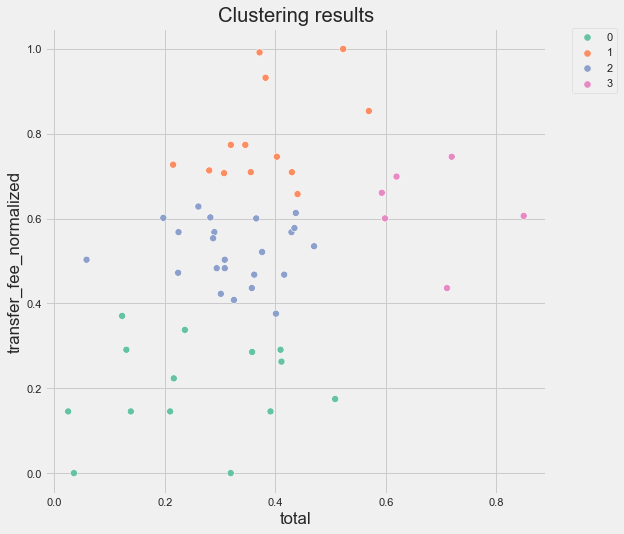

In [28]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    'total',
    'transfer_fee_normalized',
    s=50,
    data=transfer_clustered,
    hue='cluster',
    #style="true_label",
    palette="Set2"
)

scat.set_title(
    "Clustering results"
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [29]:
transfer_clustered

,player,total,transfer_fee_normalized,cluster
0,Aaron Ramsdale,0.619375,0.699097,3
1,Adam Armstrong,0.282513,0.602875,2
2,Albert Sambi Lokonga,0.365474,0.600490,2
3,Alphonse Areola,0.138610,0.145422,0
4,Angus Gunn,0.122847,0.370600,0
5,Ben Gibson,0.361916,0.467858,2
6,Ben White,0.569300,0.853683,1
7,Boubakary Soumaré,0.260838,0.628505,2
8,Christos Tzolis,0.058516,0.503079,2
9,Connor Roberts,0.216393,0.223377,0


### Ultimate Dataframe ☄️☄️☄️

In [30]:
ultimate = described_stats.merge(transfer_clustered, left_on=['player'], right_on=['player'], how='inner')

In [31]:
ultimate

,player,variable,performance_stats,transfer_fee_log_x,stats,club_destination,position,club_origin,transfer_fee,transfer_fee_log_y,transfer_fee_normalized_x,stats_weighted,progression_weighted,rating,total,transfer_fee_normalized_y,cluster
0,Cristiano Ronaldo,goals,0.782609,1.176091,0.469045,Manchester United,Centre-Forward,Juventus,15.0,1.176091,0.568150,0.351784,0.0775,0.429284,0.429284,0.568150,2
1,Cristiano Ronaldo,gca,0.360000,1.176091,0.469045,Manchester United,Centre-Forward,Juventus,15.0,1.176091,0.568150,0.351784,0.0775,0.429284,0.429284,0.568150,2
2,Cristiano Ronaldo,sca,0.506667,1.176091,0.469045,Manchester United,Centre-Forward,Juventus,15.0,1.176091,0.568150,0.351784,0.0775,0.429284,0.429284,0.568150,2
3,Cristiano Ronaldo,passes_under_pressure,0.377155,1.176091,0.469045,Manchester United,Centre-Forward,Juventus,15.0,1.176091,0.568150,0.351784,0.0775,0.429284,0.429284,0.568150,2
4,Cristiano Ronaldo,touches,0.318794,1.176091,0.469045,Manchester United,Centre-Forward,Juventus,15.0,1.176091,0.568150,0.351784,0.0775,0.429284,0.429284,0.568150,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,José Sá,saves,0.863309,0.903090,0.697505,Wolverhampton Wanderers,Goalkeeper,Olympiacos,8.0,0.903090,0.436267,0.523129,0.1875,0.710629,0.710629,0.436267,3
277,José Sá,clean_sheets,0.550000,0.903090,0.697505,Wolverhampton Wanderers,Goalkeeper,Olympiacos,8.0,0.903090,0.436267,0.523129,0.1875,0.710629,0.710629,0.436267,3
278,José Sá,passes_40yds_completed,0.520376,0.903090,0.697505,Wolverhampton Wanderers,Goalkeeper,Olympiacos,8.0,0.903090,0.436267,0.523129,0.1875,0.710629,0.710629,0.436267,3
279,José Sá,crosses_stopped,0.918919,0.903090,0.697505,Wolverhampton Wanderers,Goalkeeper,Olympiacos,8.0,0.903090,0.436267,0.523129,0.1875,0.710629,0.710629,0.436267,3


In [32]:
ultimate = ultimate.loc[:,~ultimate.T.duplicated(keep='first')]

In [33]:
ultimate.to_excel("pl_transfer_outcome.xlsx", index=False)